In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

In [2]:
import torch

In [3]:
import torch.nn as nn
import torch.nn.functional as F

# 1. Exploration

### 1.1 Linear function 

In [ ]:
def linear_function():
  np.random.seed(1)
  X = torch.from_numpy(np.random.randn(3,1))
  W = torch.from_numpy(np.random.randn(4,3))
  b = torch.from_numpy(np.random.randn(4,1))
  Y = torch.from_numpy(np.random.randn(4,1))

  result = W.matmul(X) + b
  return result

In [ ]:
print( "result = \n" + str(linear_function()))

result = 
tensor([[-2.1566],
        [ 2.9589],
        [-1.0893],
        [-0.8454]], dtype=torch.float64)


### 1.2 Computing the sigmoid

In [ ]:
import torch.nn.functional as F

In [ ]:
torch.randn(2)

tensor([-0.4636,  0.0053])

In [ ]:
def sigmoid(z):
  sigmoid = torch.sigmoid(z)

  return sigmoid

In [ ]:
print ("sigmoid(0) = " + str(sigmoid(torch.tensor(0))))
print ("sigmoid(12) = " + str(sigmoid(torch.tensor(12))))

sigmoid(0) = tensor(0.5000)
sigmoid(12) = tensor(1.0000)


### 1.3 Computing the cost

In [ ]:
import torch.nn as nn

In [ ]:
def cost(logits, labels):
  loss = nn.BCELoss(reduction="none")
  output = loss(logits, labels)
  return output

In [ ]:
logits = np.array([0.2,0.4,0.7,0.9])

cost = cost(torch.tensor(logits), torch.tensor(np.array([0.,0.,1.,1.])))
print("cost = " + str(cost))

cost = tensor([0.2231, 0.5108, 0.3567, 0.1054], dtype=torch.float64)


### 1.4 One hot encoding

In [ ]:
import torch.nn.functional as F

In [ ]:
def one_hot_encode(labels, C):
  one_hot = F.one_hot(labels, num_classes=C)
  return one_hot  

In [ ]:
labels = np.array([1,2,3,0,2,1])

one_hot = one_hot_encode(torch.tensor(labels), C = 4)
print ("one_hot = \n" + str(one_hot.T))

one_hot = 
tensor([[0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0]])


### 1.5 Initialize with zeros and ones

In [ ]:
def ones(shape):
  ones = torch.ones(shape)
  return ones

In [ ]:
print ("ones = " + str(ones([3])))

ones = tensor([1., 1., 1.])


# 2. Building Neural network with Pytorch

### 2.1 Problem statement: SIGNS dataset

In [45]:
train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/train_signs.h5', "r")
train_set_x_orig = torch.tensor(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = torch.tensor(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/datasets/test_signs.h5', "r")
test_set_x_orig = torch.tensor(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = torch.tensor(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

In [46]:
X_test_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
X_test = X_test_flatten/255
X_test.shape

torch.Size([120, 12288])

In [47]:
X_train_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
X_train = X_train_flatten/255
X_train.shape

torch.Size([1080, 12288])

y = 5


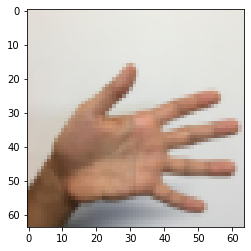

In [ ]:
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

The model is LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes.

### 2.2 Initialize parameters

In [ ]:
def initialize_parameters():
  torch.random.manual_seed(1)

  w = torch.empty(25, 12288)
  W1 = torch.nn.init.xavier_uniform_(w, gain=1.0)
  b1 = torch.zeros(25,1)
  w = torch.empty(12, 25)
  W2 = torch.nn.init.xavier_uniform_(w, gain=1.0)
  b2 = torch.zeros(12, 1)
  w = torch.empty(6, 12)
  W3 = torch.nn.init.xavier_uniform_(w, gain=1.0)
  b3 = torch.zeros(6, 1)

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2,
                "W3":W3,
                "b3":b3}

  return parameters

In [ ]:
parameters = initialize_parameters()
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

In [ ]:
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))

W1 = torch.Size([25, 12288])
b1 = torch.Size([25, 1])
W2 = torch.Size([12, 25])
b2 = torch.Size([12, 1])


### 2.3 Forward propagation

In [ ]:
import torch.nn as nn

In [ ]:
def forward_propagation(X, parameters):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]

  relu = nn.ReLU()
  softmax = nn.Softmax(dim=1)
  Z1 = W1.matmul(torch.tensor(X_train).float()) + b1
  a1 = relu(Z1)
  Z2 = W2.matmul(a1) + b2
  a2 = relu(Z2)
  Z3 = W3.matmul(a2) + b3
  a3 = softmax(Z3)

  return a3

In [ ]:
parameters = initialize_parameters()
a3 = forward_propagation(X_train, parameters)
print("a3 = " + str(a3))

a3 = tensor([[0.0010, 0.0009, 0.0010,  ..., 0.0010, 0.0011, 0.0010],
        [0.0008, 0.0009, 0.0008,  ..., 0.0010, 0.0009, 0.0010],
        [0.0010, 0.0010, 0.0008,  ..., 0.0009, 0.0007, 0.0008],
        [0.0008, 0.0009, 0.0008,  ..., 0.0009, 0.0010, 0.0010],
        [0.0011, 0.0009, 0.0011,  ..., 0.0009, 0.0010, 0.0009],
        [0.0010, 0.0009, 0.0009,  ..., 0.0009, 0.0008, 0.0009]])


In [ ]:
a3.shape

torch.Size([6, 1080])

### 2.4 Compute Cost

In [ ]:
def compute_cost(a3, Y):
  loss = nn.CrossEntropyLoss(reduction='mean')
  cost = loss(a3, Y)
  cost.backward()
  return cost

In [ ]:
Y_train.shape

torch.Size([6, 1080])

In [ ]:
a3.shape

torch.Size([6, 1080])

In [ ]:
a4 = a3.T.argmax(-1)
a4.shape

torch.Size([1080])

In [ ]:
parameters = initialize_parameters()
a3 = forward_propagation(X_train, parameters)
# a3 = a3.argmax(-1)
print(a3.shape)
print(a3)
print(Y_train.shape)
print(Y_train)
a4 = a3.T.argmax(-1)
Y_train1 = Y_train.T.argmax(-1)
print(a4.shape)
print(a4)
print(Y_train1.shape)
print(Y_train1)
cost = compute_cost(a3, Y_train1)
print("cost = " + str(cost))

torch.Size([6, 1080])
tensor([[0.0010, 0.0009, 0.0010,  ..., 0.0010, 0.0011, 0.0010],
        [0.0008, 0.0009, 0.0008,  ..., 0.0010, 0.0009, 0.0010],
        [0.0010, 0.0010, 0.0008,  ..., 0.0009, 0.0007, 0.0008],
        [0.0008, 0.0009, 0.0008,  ..., 0.0009, 0.0010, 0.0010],
        [0.0011, 0.0009, 0.0011,  ..., 0.0009, 0.0010, 0.0009],
        [0.0010, 0.0009, 0.0009,  ..., 0.0009, 0.0008, 0.0009]])
torch.Size([6, 1080])
tensor([[0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 0, 1]])
torch.Size([1080])
tensor([4, 2, 4,  ..., 1, 0, 0])
torch.Size([1080])
tensor([5, 0, 2,  ..., 2, 4, 5])


ValueError: ignored

In [ ]:
print(a3)

tensor([[0.0010, 0.0009, 0.0010,  ..., 0.0010, 0.0011, 0.0010],
        [0.0008, 0.0009, 0.0008,  ..., 0.0010, 0.0009, 0.0010],
        [0.0010, 0.0010, 0.0008,  ..., 0.0009, 0.0007, 0.0008],
        [0.0008, 0.0009, 0.0008,  ..., 0.0009, 0.0010, 0.0010],
        [0.0011, 0.0009, 0.0011,  ..., 0.0009, 0.0010, 0.0009],
        [0.0010, 0.0009, 0.0009,  ..., 0.0009, 0.0008, 0.0009]])


In [ ]:
print(Y_train)

tensor([[0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 0, 1]])


In [ ]:
loss = nn.CrossEntropyLoss()
>>> input = torch.randn(3, 5, requires_grad=True)
>>> target = torch.empty(3, dtype=torch.long).random_(5)
>>> output = loss(input, target)
>>> output.backward()

# 3. Build the Model

### 3.1 Model Class

In [34]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(12288, 25)
    self.hidden2 = nn.Linear(25,12)
    self.output = nn.Linear(12, 6)
  
  def forward(self, x):
    x = self.hidden1(x)
    x = F.relu(x)
    x = self.hidden2(x)
    x = F.relu(x)
    x = self.output(x)
    return x

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss
  
  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {"val_loss":loss, "val_acc":acc}
  
  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x["val_acc"] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {"val_loss": epoch_loss.item(), "val_acc":epoch_acc.item()}
  
  def epoch_end(self, epoch, result):
    print(f"Epoch [{epoch}], validation loss: {result['val_loss']:.4f}, validation accuracy: {result['val_acc']:.4f}")

In [35]:
model = Network()

In [36]:
model

Network(
  (hidden1): Linear(in_features=12288, out_features=25, bias=True)
  (hidden2): Linear(in_features=25, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=6, bias=True)
)

### 3.2 DataLoaders

In [37]:
from torch.utils.data import DataLoader, TensorDataset, random_split

In [48]:
train_dataset = TensorDataset(X_train, train_set_y_orig)
val_dataset = TensorDataset(X_test, test_set_y_orig)

In [49]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

### 3.3 Training- Accuracy, Evaluate and Fit function

In [53]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  acc = torch.tensor(torch.sum(preds == labels) / len(preds))
  return acc

In [50]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [57]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.Adam):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [54]:
result = evaluate(model, val_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
result

{'val_acc': 0.125, 'val_loss': 1.8144011497497559}

In [58]:
history1 = fit(100, 1e-4, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch [0], validation loss: 1.7751, validation accuracy: 0.1745
Epoch [1], validation loss: 1.7719, validation accuracy: 0.2370
Epoch [2], validation loss: 1.7573, validation accuracy: 0.2630
Epoch [3], validation loss: 1.7314, validation accuracy: 0.2839
Epoch [4], validation loss: 1.7240, validation accuracy: 0.3151
Epoch [5], validation loss: 1.7021, validation accuracy: 0.4089
Epoch [6], validation loss: 1.6961, validation accuracy: 0.3698
Epoch [7], validation loss: 1.6755, validation accuracy: 0.3411
Epoch [8], validation loss: 1.6647, validation accuracy: 0.4167
Epoch [9], validation loss: 1.6461, validation accuracy: 0.4323
Epoch [10], validation loss: 1.6385, validation accuracy: 0.3854
Epoch [11], validation loss: 1.6218, validation accuracy: 0.3516
Epoch [12], validation loss: 1.6033, validation accuracy: 0.4193
Epoch [13], validation loss: 1.5839, validation accuracy: 0.4349
Epoch [14], validation loss: 1.5641, validation accuracy: 0.4245
Epoch [15], validation loss: 1.5575

In [59]:
history2 = fit(100, 1e-4, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch [0], validation loss: 0.9207, validation accuracy: 0.7266
Epoch [1], validation loss: 0.9025, validation accuracy: 0.7292
Epoch [2], validation loss: 0.9239, validation accuracy: 0.6875
Epoch [3], validation loss: 0.9133, validation accuracy: 0.7083
Epoch [4], validation loss: 0.8985, validation accuracy: 0.7109
Epoch [5], validation loss: 0.8975, validation accuracy: 0.7266
Epoch [6], validation loss: 0.9103, validation accuracy: 0.7083
Epoch [7], validation loss: 0.9089, validation accuracy: 0.7188
Epoch [8], validation loss: 0.8829, validation accuracy: 0.7422
Epoch [9], validation loss: 0.8791, validation accuracy: 0.7083
Epoch [10], validation loss: 0.9040, validation accuracy: 0.7188
Epoch [11], validation loss: 0.8773, validation accuracy: 0.7318
Epoch [12], validation loss: 0.8704, validation accuracy: 0.7344
Epoch [13], validation loss: 0.8821, validation accuracy: 0.7057
Epoch [14], validation loss: 0.8633, validation accuracy: 0.7370
Epoch [15], validation loss: 0.8625

In [60]:
history3 = fit(100, 1e-4, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch [0], validation loss: 0.6676, validation accuracy: 0.7760
Epoch [1], validation loss: 0.6713, validation accuracy: 0.7839
Epoch [2], validation loss: 0.6643, validation accuracy: 0.8073
Epoch [3], validation loss: 0.6807, validation accuracy: 0.7969
Epoch [4], validation loss: 0.6922, validation accuracy: 0.7682
Epoch [5], validation loss: 0.6707, validation accuracy: 0.8047
Epoch [6], validation loss: 0.6618, validation accuracy: 0.8047
Epoch [7], validation loss: 0.7297, validation accuracy: 0.7083
Epoch [8], validation loss: 0.6816, validation accuracy: 0.7917
Epoch [9], validation loss: 0.6723, validation accuracy: 0.7682
Epoch [10], validation loss: 0.6668, validation accuracy: 0.7891
Epoch [11], validation loss: 0.6573, validation accuracy: 0.7682
Epoch [12], validation loss: 0.6544, validation accuracy: 0.7760
Epoch [13], validation loss: 0.6497, validation accuracy: 0.7969
Epoch [14], validation loss: 0.6511, validation accuracy: 0.7865
Epoch [15], validation loss: 0.6592

In [61]:
history4 = fit(100, 1e-4, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch [0], validation loss: 0.5902, validation accuracy: 0.8047
Epoch [1], validation loss: 0.5461, validation accuracy: 0.8307
Epoch [2], validation loss: 0.5766, validation accuracy: 0.8177
Epoch [3], validation loss: 0.6081, validation accuracy: 0.7969
Epoch [4], validation loss: 0.5378, validation accuracy: 0.8568
Epoch [5], validation loss: 0.5993, validation accuracy: 0.8568
Epoch [6], validation loss: 0.5576, validation accuracy: 0.8411
Epoch [7], validation loss: 0.5391, validation accuracy: 0.8307
Epoch [8], validation loss: 0.5504, validation accuracy: 0.8307
Epoch [9], validation loss: 0.5344, validation accuracy: 0.8385
Epoch [10], validation loss: 0.5749, validation accuracy: 0.8099
Epoch [11], validation loss: 0.6041, validation accuracy: 0.8099
Epoch [12], validation loss: 0.5813, validation accuracy: 0.8021
Epoch [13], validation loss: 0.5355, validation accuracy: 0.8464
Epoch [14], validation loss: 0.5374, validation accuracy: 0.8307
Epoch [15], validation loss: 0.5372

### 3.4 Accuracy vs epochs plot

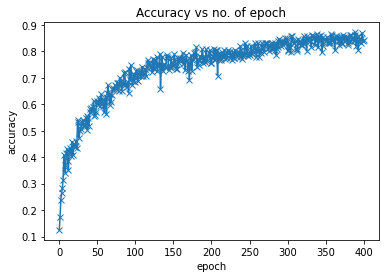

In [62]:
history = [result] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs no. of epoch');